# DS2500 Day 17

Mar 17, 2023

#### Content
- Overfitting (super briefly)
- Clustering
    - K-means
    - How do we pick a k for k-means clustering?  
        - ... similar to how we pick a polynomial order, but not exactly
- Principal Component Analysis
    - removes correlation between features
    - attempts to "squish" many features into a fewer features
        - loses fidelity to original features (fewer features are only an approximation of the many)
        - you can build a 2-feature scatter "map" of N > 2 features, nifty for data viz


## In Class Activity 1

- Cluster the penguins data into 3 clusters
- Visualize the clusters across all features using `sns.pairplot()`
    - add your clusters as a new column of the dataframe with `df_penguin['cluster'] = y` or similar    
    - `sns.pairplot(data=df_penguin, hue='cluster', palette='Set2')`
- Which features does the clustering do a good (or bad) job of seperating? Why?  
    - Are other features ignored because of their small variance ... how can we fix this?


In [14]:
from sklearn.cluster import KMeans
    
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True, how='any')
    
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


C:\Users\ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

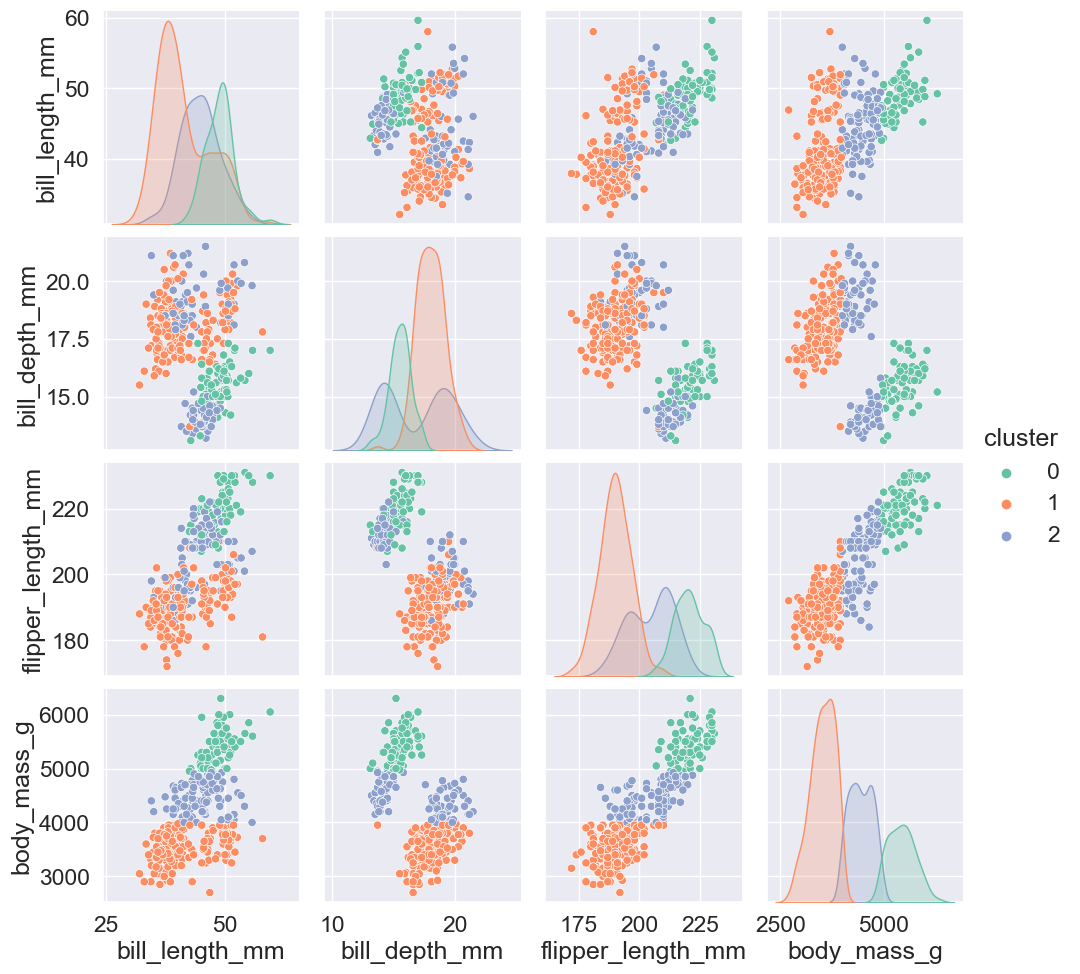

In [15]:
# extract features
x_feat_list = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
x = df_penguin.loc[:, x_feat_list].values

n_clusters = 3

# fit clusters
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

# plot
plt.figure()
plt.suptitle("three sample clusters")
df_penguin["cluster"] = y
sns.pairplot(data = df_penguin, hue = "cluster", palette = "Set2")